In [19]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import heapq

#professionalism: I wanted to highlight the help Svitlana Midianko provided when I was writing this code. Specificially, she helped me understand purpose of each class, how to plot the data and what additional function I could use.

In [78]:
import heapq

class Event:
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)


class Schedule:
    '''
    Implement an event schedule using a priority queue. You can add events and
    run the next event.
    
    The `now` attribute contains the time at which the last event was run.
    '''
    
    def __init__(self, groceryStore):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
        self.groceryStore = groceryStore
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        heapq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def next_event_time(self):
        # Return the time of the next event. The `now` attribute of this class
        # contain the time of the last event that was run.
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = heapq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        # Print out diagnostic information about the events in the schedule.
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')
            
class Queue:
    #initiates an object with 0 customers in the queue and 0 customers served
    def __init__(self, cust_in_queue, cust_served):
        self.cust_in_queue = 0
        self.cust_served = 0
        
class GroceryStore:
    def __init__(self, queue, arrival_dist, service_time):
        #storing information about the arrival distribution, service time and data for the plot
        self.queue = queue
        self.arrival_dist = arrival_dist
        self.service_time = service_time
        self.plotting_data = {"time" :[], "cust_in_queue" : []}
        
        
    def schedule_arrival(self, schedule):
        #calculating the time of the next arrival, creating an event of the arrival, and adding it to a 
        #schedule, updating the queue count
        next_arrival_time = schedule.now + self.arrival_dist.rvs()
        customer_arrives_event = Event(next_arrival_time, cust_serving)
        schedule.add_event_at(customer_arrives_event.timestamp, customer_arrives_event.function)
        
        self.queue.cust_in_queue += 1 
        schedule.now = customer_arrives_event.timestamp

In [ ]:
import heapq

class Event:
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)


class Schedule:
    '''
    Implement an event schedule using a priority queue. You can add events and
    run the next event.
    
    The `now` attribute contains the time at which the last event was run.
    '''
    
    def __init__(self, groceryStore):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
        self.groceryStore = groceryStore
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        heapq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def next_event_time(self):
        # Return the time of the next event. The `now` attribute of this class
        # contain the time of the last event that was run.
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = heapq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        # Print out diagnostic information about the events in the schedule.
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')
            
class Queue:
    #initiates an object with 0 customers in the queue and 0 customers served
    def __init__(self, cust_in_queue, cust_being_served, ):
        self.cust_in_queue = 0
        self.cust_being_served = 0
        service_time_dist = sts.truncnorm(a=0, b=float('inf'), loc=3, scale=1)

    def add_customer(self):
        self.cust_in_queue += 1
        
        if self.cust_being_served < 1:
            schedule.add_event_after(0, start_serving_customer)
    
    def start_serving_customer(self):
        self.cust_being_served += 1
        self.cust_being_served -= 1
        
        schedule.add_event_after(service_time_dist.rvs(), finish_serving_customer)
    
    def finish_serving_customer(self):
        self.cust_being_served -= 1
    
class GroceryStore:
    
    def __init__(self, arrival_rate, service_distribution):
        self.queue = Queue(service_distribution)
        self.arrival_distribution = sts.expon(scale=1/arrival_rate)

    def add_customer(self, schedule):
        # Add this customer to the queue
        self.queue.add_customer(schedule)
        # Schedule when to add another customer
        schedule.add_event_after(
            self.arrival_distribution.rvs(),
            self.add_customer)

    def run(self, schedule):
        # Schedule when the first customer arrives
        schedule.add_event_after(
            self.arrival_distribution.rvs(),
            self.add_customer)

In [79]:
def cust_serving(schedule):
    #additional function which is used to handle customer serving, while other customers are arriving 
    #it acceses schedule_arrival from the GroceryStore class
    fixed_serve_rate = schedule.groceryStore.service_time
    
    #sheduling new arrivals while customers are served. Creatting additional variable helps us 
    #schedule this new arrivals WHILE customers are served
    schedule.now_ = schedule.now
    
    while schedule.now < schedule.now_ + fixed_serve_rate: 
        schedule.groceryStore.schedule_arrival(schedule)

    #updating the queue count
    schedule.groceryStore.queue.cust_in_queue -=1
    
    #adding data to the time and # of cust in the queue lists
    schedule.groceryStore.plotting_data["time"].append(schedule.now)
    schedule.groceryStore.plotting_data["cust_in_queue"].append( schedule.groceryStore.queue.cust_in_queue)

No handles with labels found to put in legend.


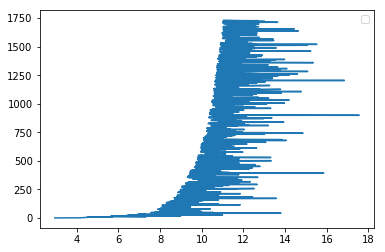

In [98]:
#setting up paramters for the simulation
arrival_rate = 1.2
service_rate = 1
run_until = 10

def run_simulation(arrival_rate, service_rate, run_until):
    #creating an exponential distribution to sample waiting times from
    arrival_distribution = sts.expon(scale=1/arrival_rate)
    #setting up a queue object 
    queue = Queue(0,0)
    #setting up a grocery store object
    groceryStore = GroceryStore(queue, arrival_distribution, service_rate)
    #setting up a schedule and grocery store objects
    schedule = Schedule(groceryStore)
    groceryStore.schedule_arrival(schedule)
    
    #running the simulation until a given time
    while schedule.next_event_time() <= run_until:
        #running events from the schedule
        schedule.run_next_event()
        
    #plotting the collected data
    plt.plot(groceryStore.plotting_data["time"],groceryStore.plotting_data["cust_in_queue"] )
    plt.legend()
        
run_simulation(arrival_rate, service_rate, run_until)

Reflection:
In this preclass work I used object oriented programming to implement an M/M/1 model. I used 4 different classes to store information about the paramters and data, and simulate grocery store queues. The code produces a plot that shows the number of people in the queue in over a certain period in time. The code is commented properly and explained in a way that a person who did not write it, would understand the purpose of different objects/for or while loops. The variable names are chosen appropriately and they can be easily interpreted in the context of a grocery store simulation.